# Gradient Descent

This notebook will implement gradient descent on the pizza data , this is implemented from scratch similar to the gradient descent notebook in the jupyter notebooks directory.

Once again, let's load pizzas and reservations from `pizza.txt`:

In [1]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

Here are the `predict()` and `loss()` functions again:

In [2]:
def predict(X, w, b):
    return X * w + b

In [3]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

Now let's set `b` at 0, so that we have a 2-dimensional chart, and let's visualize how the loss changes as `w` changes. 

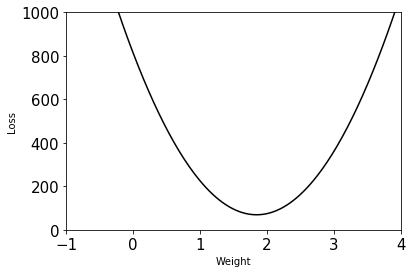

In [4]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook:
%matplotlib inline

# Compute losses for w ranging from -1 to 4:
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

# Plot weights and losses:
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.plot(weights, losses, color="black")

plt.show()

If we also consider `b`, then the loss becomes a surface, like this:

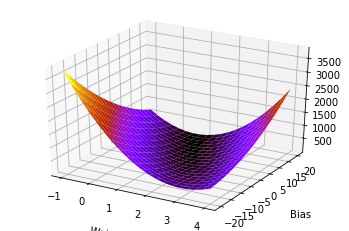

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Prepare matrices for 3D plot (W, B and L for weights, biases and losses):
MESH_SIZE = 20
weights = np.linspace(-1, 4, MESH_SIZE)
biases = np.linspace(-20, 20, MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))

# Plot surface:
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Weight", labelpad=15)
ax.set_ylabel("Bias", labelpad=15)
ax.set_zlabel("Loss", labelpad=15)
ax.plot_surface(W, B, L, cmap=cm.gnuplot, antialiased=True)

plt.show()

We want to implement gradient descent–and algorithm that descends the gradient of this curve. First, let's write a function to calculate the gradient. In mathematical formulae, the loss looks like this:

\begin{align*}
L = \frac{1}{m}\sum\limits_{i} ((wx_i + b) - y_i) ^ 2
\end{align*}

The gradient of this loss is the composition of the derivatives of `L` with respect to `w` and `b`. If you know calculus, then you can calculate those derivatives on your own. If you don't, then here they are:

\begin{align*}
\frac{\partial L}{\partial w} = \frac{1}{m}\sum\limits_{i} 2x((wx_i + b) - y_i)
\end{align*}

\begin{align*}
\frac{\partial L}{\partial b} = \frac{1}{m}\sum\limits_{i} 2((wx_i + b) - y_i)
\end{align*}

And here is a function that returns both derivatives:

In [6]:
def gradient(X, Y, w, b):
    w_gradient = np.average(2 * X * (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

In [7]:
gradient(X, Y, 2, 3)

(144.4, 2.933333333333333)

Now that we have `gradient()`, we can update `train()` to do gradient descent:

In [8]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.6f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

Let's run `train()`:

In [9]:
w, b = train(X, Y, 10000, 0.001)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 302.576956
Iteration    2 => Loss: 141.984090
Iteration    3 => Loss: 91.421377
Iteration    4 => Loss: 75.479058
Iteration    5 => Loss: 70.429883
Iteration    6 => Loss: 68.808210
Iteration    7 => Loss: 68.265016
Iteration    8 => Loss: 68.061193
Iteration    9 => Loss: 67.964188
Iteration   10 => Loss: 67.900826
Iteration   11 => Loss: 67.848085
Iteration   12 => Loss: 67.798721
Iteration   13 => Loss: 67.750454
Iteration   14 => Loss: 67.702567
Iteration   15 => Loss: 67.654834
Iteration   16 => Loss: 67.607185
Iteration   17 => Loss: 67.559597
Iteration   18 => Loss: 67.512062
Iteration   19 => Loss: 67.464579
Iteration   20 => Loss: 67.417147
Iteration   21 => Loss: 67.369765
Iteration   22 => Loss: 67.322434
Iteration   23 => Loss: 67.275153
Iteration   24 => Loss: 67.227922
Iteration   25 => Loss: 67.180742
Iteration   26 => Loss: 67.133611
Iteration   27 => Loss: 67.086531
Iteration   28 => Loss: 67.039501
Iteration  

Iteration 1434 => Loss: 32.750400
Iteration 1435 => Loss: 32.739869
Iteration 1436 => Loss: 32.729348
Iteration 1437 => Loss: 32.718839
Iteration 1438 => Loss: 32.708341
Iteration 1439 => Loss: 32.697854
Iteration 1440 => Loss: 32.687378
Iteration 1441 => Loss: 32.676913
Iteration 1442 => Loss: 32.666460
Iteration 1443 => Loss: 32.656018
Iteration 1444 => Loss: 32.645586
Iteration 1445 => Loss: 32.635166
Iteration 1446 => Loss: 32.624757
Iteration 1447 => Loss: 32.614359
Iteration 1448 => Loss: 32.603972
Iteration 1449 => Loss: 32.593596
Iteration 1450 => Loss: 32.583231
Iteration 1451 => Loss: 32.572877
Iteration 1452 => Loss: 32.562534
Iteration 1453 => Loss: 32.552202
Iteration 1454 => Loss: 32.541881
Iteration 1455 => Loss: 32.531571
Iteration 1456 => Loss: 32.521272
Iteration 1457 => Loss: 32.510984
Iteration 1458 => Loss: 32.500707
Iteration 1459 => Loss: 32.490441
Iteration 1460 => Loss: 32.480185
Iteration 1461 => Loss: 32.469941
Iteration 1462 => Loss: 32.459707
Iteration 1463

Iteration 2433 => Loss: 26.266800
Iteration 2434 => Loss: 26.263160
Iteration 2435 => Loss: 26.259525
Iteration 2436 => Loss: 26.255893
Iteration 2437 => Loss: 26.252264
Iteration 2438 => Loss: 26.248640
Iteration 2439 => Loss: 26.245020
Iteration 2440 => Loss: 26.241403
Iteration 2441 => Loss: 26.237791
Iteration 2442 => Loss: 26.234182
Iteration 2443 => Loss: 26.230577
Iteration 2444 => Loss: 26.226975
Iteration 2445 => Loss: 26.223378
Iteration 2446 => Loss: 26.219785
Iteration 2447 => Loss: 26.216195
Iteration 2448 => Loss: 26.212609
Iteration 2449 => Loss: 26.209027
Iteration 2450 => Loss: 26.205448
Iteration 2451 => Loss: 26.201874
Iteration 2452 => Loss: 26.198303
Iteration 2453 => Loss: 26.194736
Iteration 2454 => Loss: 26.191173
Iteration 2455 => Loss: 26.187614
Iteration 2456 => Loss: 26.184058
Iteration 2457 => Loss: 26.180507
Iteration 2458 => Loss: 26.176959
Iteration 2459 => Loss: 26.173415
Iteration 2460 => Loss: 26.169874
Iteration 2461 => Loss: 26.166337
Iteration 2462

Iteration 3465 => Loss: 23.985273
Iteration 3466 => Loss: 23.984058
Iteration 3467 => Loss: 23.982845
Iteration 3468 => Loss: 23.981633
Iteration 3469 => Loss: 23.980423
Iteration 3470 => Loss: 23.979213
Iteration 3471 => Loss: 23.978005
Iteration 3472 => Loss: 23.976798
Iteration 3473 => Loss: 23.975593
Iteration 3474 => Loss: 23.974389
Iteration 3475 => Loss: 23.973186
Iteration 3476 => Loss: 23.971984
Iteration 3477 => Loss: 23.970784
Iteration 3478 => Loss: 23.969585
Iteration 3479 => Loss: 23.968387
Iteration 3480 => Loss: 23.967190
Iteration 3481 => Loss: 23.965995
Iteration 3482 => Loss: 23.964801
Iteration 3483 => Loss: 23.963608
Iteration 3484 => Loss: 23.962417
Iteration 3485 => Loss: 23.961227
Iteration 3486 => Loss: 23.960038
Iteration 3487 => Loss: 23.958850
Iteration 3488 => Loss: 23.957664
Iteration 3489 => Loss: 23.956479
Iteration 3490 => Loss: 23.955295
Iteration 3491 => Loss: 23.954112
Iteration 3492 => Loss: 23.952931
Iteration 3493 => Loss: 23.951751
Iteration 3494

Iteration 4592 => Loss: 23.187339
Iteration 4593 => Loss: 23.186973
Iteration 4594 => Loss: 23.186607
Iteration 4595 => Loss: 23.186241
Iteration 4596 => Loss: 23.185876
Iteration 4597 => Loss: 23.185512
Iteration 4598 => Loss: 23.185147
Iteration 4599 => Loss: 23.184783
Iteration 4600 => Loss: 23.184420
Iteration 4601 => Loss: 23.184056
Iteration 4602 => Loss: 23.183694
Iteration 4603 => Loss: 23.183331
Iteration 4604 => Loss: 23.182969
Iteration 4605 => Loss: 23.182607
Iteration 4606 => Loss: 23.182246
Iteration 4607 => Loss: 23.181885
Iteration 4608 => Loss: 23.181525
Iteration 4609 => Loss: 23.181165
Iteration 4610 => Loss: 23.180805
Iteration 4611 => Loss: 23.180446
Iteration 4612 => Loss: 23.180087
Iteration 4613 => Loss: 23.179728
Iteration 4614 => Loss: 23.179370
Iteration 4615 => Loss: 23.179012
Iteration 4616 => Loss: 23.178655
Iteration 4617 => Loss: 23.178297
Iteration 4618 => Loss: 23.177941
Iteration 4619 => Loss: 23.177584
Iteration 4620 => Loss: 23.177228
Iteration 4621

Iteration 5643 => Loss: 22.955423
Iteration 5644 => Loss: 22.955303
Iteration 5645 => Loss: 22.955183
Iteration 5646 => Loss: 22.955064
Iteration 5647 => Loss: 22.954945
Iteration 5648 => Loss: 22.954825
Iteration 5649 => Loss: 22.954706
Iteration 5650 => Loss: 22.954587
Iteration 5651 => Loss: 22.954468
Iteration 5652 => Loss: 22.954349
Iteration 5653 => Loss: 22.954231
Iteration 5654 => Loss: 22.954112
Iteration 5655 => Loss: 22.953994
Iteration 5656 => Loss: 22.953876
Iteration 5657 => Loss: 22.953757
Iteration 5658 => Loss: 22.953639
Iteration 5659 => Loss: 22.953522
Iteration 5660 => Loss: 22.953404
Iteration 5661 => Loss: 22.953286
Iteration 5662 => Loss: 22.953169
Iteration 5663 => Loss: 22.953051
Iteration 5664 => Loss: 22.952934
Iteration 5665 => Loss: 22.952817
Iteration 5666 => Loss: 22.952700
Iteration 5667 => Loss: 22.952583
Iteration 5668 => Loss: 22.952466
Iteration 5669 => Loss: 22.952350
Iteration 5670 => Loss: 22.952233
Iteration 5671 => Loss: 22.952117
Iteration 5672

Iteration 6693 => Loss: 22.879625
Iteration 6694 => Loss: 22.879585
Iteration 6695 => Loss: 22.879546
Iteration 6696 => Loss: 22.879507
Iteration 6697 => Loss: 22.879468
Iteration 6698 => Loss: 22.879429
Iteration 6699 => Loss: 22.879390
Iteration 6700 => Loss: 22.879351
Iteration 6701 => Loss: 22.879312
Iteration 6702 => Loss: 22.879273
Iteration 6703 => Loss: 22.879234
Iteration 6704 => Loss: 22.879196
Iteration 6705 => Loss: 22.879157
Iteration 6706 => Loss: 22.879118
Iteration 6707 => Loss: 22.879080
Iteration 6708 => Loss: 22.879041
Iteration 6709 => Loss: 22.879002
Iteration 6710 => Loss: 22.878964
Iteration 6711 => Loss: 22.878925
Iteration 6712 => Loss: 22.878887
Iteration 6713 => Loss: 22.878848
Iteration 6714 => Loss: 22.878810
Iteration 6715 => Loss: 22.878772
Iteration 6716 => Loss: 22.878733
Iteration 6717 => Loss: 22.878695
Iteration 6718 => Loss: 22.878657
Iteration 6719 => Loss: 22.878619
Iteration 6720 => Loss: 22.878580
Iteration 6721 => Loss: 22.878542
Iteration 6722

Iteration 7805 => Loss: 22.854041
Iteration 7806 => Loss: 22.854029
Iteration 7807 => Loss: 22.854017
Iteration 7808 => Loss: 22.854005
Iteration 7809 => Loss: 22.853994
Iteration 7810 => Loss: 22.853982
Iteration 7811 => Loss: 22.853970
Iteration 7812 => Loss: 22.853958
Iteration 7813 => Loss: 22.853946
Iteration 7814 => Loss: 22.853934
Iteration 7815 => Loss: 22.853922
Iteration 7816 => Loss: 22.853910
Iteration 7817 => Loss: 22.853898
Iteration 7818 => Loss: 22.853886
Iteration 7819 => Loss: 22.853874
Iteration 7820 => Loss: 22.853863
Iteration 7821 => Loss: 22.853851
Iteration 7822 => Loss: 22.853839
Iteration 7823 => Loss: 22.853827
Iteration 7824 => Loss: 22.853815
Iteration 7825 => Loss: 22.853804
Iteration 7826 => Loss: 22.853792
Iteration 7827 => Loss: 22.853780
Iteration 7828 => Loss: 22.853768
Iteration 7829 => Loss: 22.853757
Iteration 7830 => Loss: 22.853745
Iteration 7831 => Loss: 22.853733
Iteration 7832 => Loss: 22.853721
Iteration 7833 => Loss: 22.853710
Iteration 7834

Iteration 8923 => Loss: 22.846179
Iteration 8924 => Loss: 22.846176
Iteration 8925 => Loss: 22.846172
Iteration 8926 => Loss: 22.846168
Iteration 8927 => Loss: 22.846165
Iteration 8928 => Loss: 22.846161
Iteration 8929 => Loss: 22.846157
Iteration 8930 => Loss: 22.846154
Iteration 8931 => Loss: 22.846150
Iteration 8932 => Loss: 22.846146
Iteration 8933 => Loss: 22.846143
Iteration 8934 => Loss: 22.846139
Iteration 8935 => Loss: 22.846136
Iteration 8936 => Loss: 22.846132
Iteration 8937 => Loss: 22.846128
Iteration 8938 => Loss: 22.846125
Iteration 8939 => Loss: 22.846121
Iteration 8940 => Loss: 22.846117
Iteration 8941 => Loss: 22.846114
Iteration 8942 => Loss: 22.846110
Iteration 8943 => Loss: 22.846107
Iteration 8944 => Loss: 22.846103
Iteration 8945 => Loss: 22.846100
Iteration 8946 => Loss: 22.846096
Iteration 8947 => Loss: 22.846092
Iteration 8948 => Loss: 22.846089
Iteration 8949 => Loss: 22.846085
Iteration 8950 => Loss: 22.846082
Iteration 8951 => Loss: 22.846078
Iteration 8952

Iteration 9930 => Loss: 22.843916
Iteration 9931 => Loss: 22.843915
Iteration 9932 => Loss: 22.843914
Iteration 9933 => Loss: 22.843913
Iteration 9934 => Loss: 22.843911
Iteration 9935 => Loss: 22.843910
Iteration 9936 => Loss: 22.843909
Iteration 9937 => Loss: 22.843908
Iteration 9938 => Loss: 22.843906
Iteration 9939 => Loss: 22.843905
Iteration 9940 => Loss: 22.843904
Iteration 9941 => Loss: 22.843903
Iteration 9942 => Loss: 22.843901
Iteration 9943 => Loss: 22.843900
Iteration 9944 => Loss: 22.843899
Iteration 9945 => Loss: 22.843898
Iteration 9946 => Loss: 22.843896
Iteration 9947 => Loss: 22.843895
Iteration 9948 => Loss: 22.843894
Iteration 9949 => Loss: 22.843893
Iteration 9950 => Loss: 22.843892
Iteration 9951 => Loss: 22.843890
Iteration 9952 => Loss: 22.843889
Iteration 9953 => Loss: 22.843888
Iteration 9954 => Loss: 22.843887
Iteration 9955 => Loss: 22.843885
Iteration 9956 => Loss: 22.843884
Iteration 9957 => Loss: 22.843883
Iteration 9958 => Loss: 22.843882
Iteration 9959

Here are the parameters `w` and `b`:

In [10]:
w

1.0848258524488616

In [11]:
b

13.108507160092502

And finally, here are the pizzas we can expect to sell for 42 reservations:

In [12]:
reservations = 42
predict(reservations, w, b)

58.67119296294469

If we round this up to the nearest integer, this calculation based on gradient descent came up with 59 pizzas, instead of the 60 that we calculated with the previous algorithm–and it was also faster